In [88]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random




#generic least squares algorithm
def leastsquares(H,y):
    yc = y.reshape(-1,1) #column vector
    M = np.linalg.inv(np.matmul(H.T,H))
    theta = np.matmul(M, np.matmul(H.T,y) )
    return theta


#generic polynomial regression
def build_H(x,degree=1):
    H=np.zeros((len(x),degree+1))
    for d in range(degree+1):
        H[:,d]=x**d
    return H

## Matrix form
 A fast way to do that is to put the problem in matrix form. We have already seen the linear case, let's see the quadratic case

$$
X=\begin{bmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
\vdots & \vdots\\ 
1 & x_N & x_N^2\\
\end{bmatrix},~~~ y =\begin{bmatrix}
y_1\\
y_2\\
 \vdots\\ 
y_N\\
\end{bmatrix},~~~
\theta =\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{bmatrix}
 $$
 
 and observe that
 
 $$
 \sum_{i=1}^N (y_i-\theta_0-\theta_1 x_i-\theta_2 x_i^2)^2 =  (y-X\theta)^T(y-X\theta)
 $$

In [4]:
x=np.array([1,2,3,4])
H = build_H(x,degree=3)
H

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

## Least squares solution

We need to solve 
$$
\hat{\theta}:=\arg\min_{\theta}  (y-X\theta)^T(y-X\theta)
$$

the solution is

$$
\hat{\theta}= (X^TX)^{-1}X^Ty
$$

This holds no matter the degree of the polynomial because the matrix form is general!

### Step 0: we generate the data

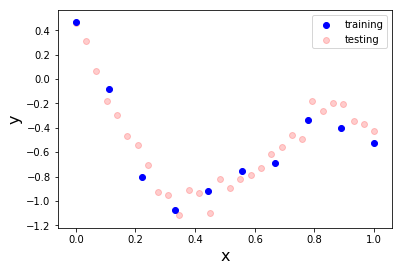

In [70]:
#True Model
theta=[0.5, -7, 6.5, 8, -8.5]
n=10 #number of observations
#training dataset
x_tr =np.linspace(0,1,n)
X_tr = build_H(x_tr,degree=4)
y_tr = np.matmul(X_tr,theta)+np.random.randn(n)/13

#testing dataset
x_te = np.linspace(0,1,30)
X_te = build_H(x_te,degree=4)
y_te = np.matmul(X_te,theta)+np.random.randn(len(x_te))/13
#plt.plot(x_te,np.matmul(X_te,theta))
plt.scatter(x_tr,y_tr,color='b',label='training',Zorder=1000);
plt.scatter(x_te,y_te,color='r',label='testing',alpha=0.2);
plt.legend()
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16);

### Step 1: we build the matrix X (sometimes it is called H)

In [71]:
#we use training data
deg= 2 #select the degree of the polynomial
X_tr = build_H(x_tr,degree=deg)
X_tr

array([[1.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.01234568],
       [1.        , 0.22222222, 0.04938272],
       [1.        , 0.33333333, 0.11111111],
       [1.        , 0.44444444, 0.19753086],
       [1.        , 0.55555556, 0.30864198],
       [1.        , 0.66666667, 0.44444444],
       [1.        , 0.77777778, 0.60493827],
       [1.        , 0.88888889, 0.79012346],
       [1.        , 1.        , 1.        ]])

### Step 2: polynomial regression

In [72]:
from sklearn.linear_model import LinearRegression
linR = LinearRegression(fit_intercept=False)

In [73]:
linR.fit(X_tr,y_tr)
np.set_printoptions(suppress=True)
linR.coef_

array([ 0.22858586, -4.02734993,  3.6166672 ])

### We can implement it from scratch 

In [74]:
class LinearRegression:
    def __init__(self,fit_intercept=False):
        print("Our class")
        self.coef_=[]
        
    def fit(self,X,y):
        print("Our fit")
        self.coef_=leastsquares(X,y)
        
    def predict(self,Xpred):
        print("Our prediction")
        return np.matmul(Xpred,self.coef_)
    
linR=LinearRegression()
linR.fit(X_tr,y_tr)

#np.set_printoptions(suppress=True)
print(linR.coef_)

Our class
Our fit
[ 0.22858586 -4.02734993  3.6166672 ]


### Step 3: prediction and computation of the MSE

Our prediction
MSE train set= 0.0615


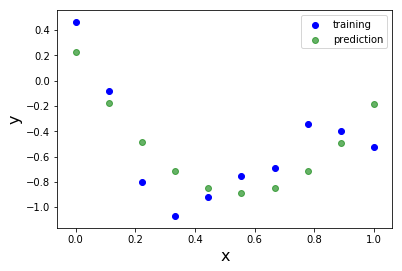

In [75]:
y_pred_tr = linR.predict(X_tr)

#training dataset
plt.scatter(x_tr,y_tr,color='b',label='training');
plt.scatter(x_tr,y_pred_tr,color='g',label='prediction',alpha=0.6,Zorder=1000);
plt.legend()
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16);
print("MSE train set=",np.round(np.sum((y_pred_tr-y_tr)**2)/len(y_tr),4))

Our prediction
Our prediction
MSE test set= 0.053


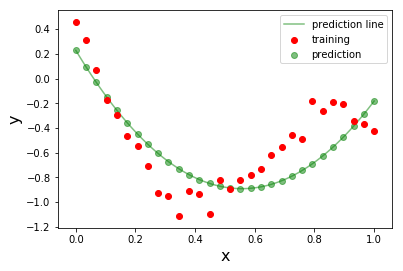

In [76]:
X_te = build_H(x_te,degree=deg)
y_pred_te = linR.predict(X_te)


plt.scatter(x_te,y_te,color='r',label='training',Zorder=1000);
plt.scatter(x_te,y_pred_te,color='g',label='prediction',alpha=0.5);

x_plot = np.linspace(0,1,100)
X_te_plot = build_H(x_plot,degree=deg)
y_pred_te_plot = linR.predict(X_te_plot)
plt.plot(x_plot,y_pred_te_plot,color='g',label='prediction line',alpha=0.5)
plt.legend()
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16);
print("MSE test set=",np.round(np.sum((y_pred_te-y_te)**2)/len(y_te),4))

In [86]:
y_tr

array([ 0.46444193, -0.08110396, -0.80356895, -1.07203034, -0.92171711,
       -0.75496826, -0.68950409, -0.33904632, -0.39943828, -0.52864518])

## LOO cross-validation
We can do LOO with a for loop

In [83]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
E = 0
ntimes=0
for train_index, test_index in loo.split(X_tr):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
    linR=LinearRegression()
    linR.fit(X_train,y_train)
    y_pred=linR.predict(X_test)
    #print(X_test)
    #print(np.sum((y_pred-y_test)**2))
    E = E + np.sum((y_pred-y_test)**2)/len(y_test)
    ntimes=ntimes+1

print("LOO score=",np.round( E/ntimes,4))

TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
Our class
Our fit
Our prediction
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
Our class
Our fit
Our prediction
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
Our class
Our fit
Our prediction
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
Our class
Our fit
Our prediction
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
Our class
Our fit
Our prediction
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
Our class
Our fit
Our prediction
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
Our class
Our fit
Our prediction
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
Our class
Our fit
Our prediction
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
Our class
Our fit
Our prediction
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]
Our class
Our fit
Our prediction
LOO score= 0.1882


We can do the same analytically without the for-loop`

Our class
Our fit
Our prediction
MSE train set= 0.0615
LOO score= 0.1882


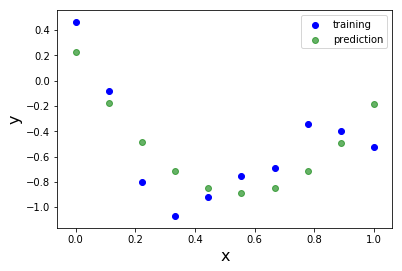

In [87]:
#we train the model using ALL data
linR=LinearRegression()
linR.fit(X_tr,y_tr)
y_pred_tr = linR.predict(X_tr)

#LOO error
R = np.matmul(X_tr,np.matmul(np.linalg.inv(np.matmul(X_tr.T,X_tr)),X_tr.T))
e = y_tr-y_pred_tr
CV = np.mean((e/(1-np.diag(R)))**2)

#training dataset
plt.scatter(x_tr,y_tr,color='b',label='training');
plt.scatter(x_tr,y_pred_tr,color='g',label='prediction',alpha=0.6,Zorder=1000);
plt.legend()
plt.xlabel("x",fontsize=16)
plt.ylabel("y",fontsize=16);
print("MSE train set=",np.round(np.sum((y_pred_tr-y_tr)**2)/len(y_tr),4))
print("LOO score=",np.round(CV,4))

We can get exactly the same result without a foor loop

## Questions
1. Try to increase the degree deg=3, deg=4 etc., re-run everything and look at the difference
between the MSE computed on the training dataset and the LOO error. You should be able to see that LOO gives you an optimal model that has a degree around 4.